In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [0]:
df = pd.read_csv('https://huseinhouse.com/dataset/mall-customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


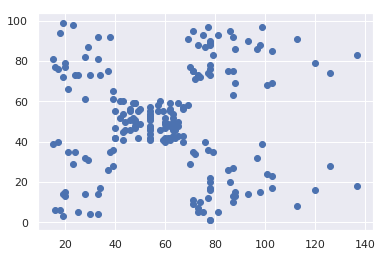

In [0]:
#generate random and kmean++centroid

X = df['Annual Income (k$)'].values
Y = df['Spending Score (1-100)'].values
plt.scatter(X, Y)
plt.show()


In [0]:
k = 6
random_centroids = np.random.randint(0 , X.shape[0], size = (6))
random_centroids

array([198, 168,  12, 141, 195,  32])

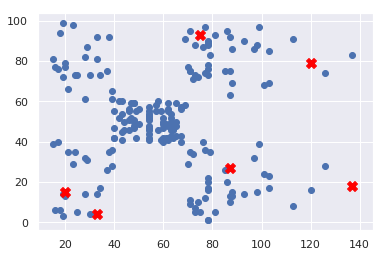

In [0]:
plt.scatter(X,Y)

plt.scatter(X[random_centroids], Y[random_centroids], label = 'centroid',
           c = 'red', marker = 'X', s =100)

plt.show()

### Use euclidean distance as distance function

In [0]:
for i in range(1,k,1):
  print(i)

1
2
3
4
5


In [0]:
#for kmean ++ centroids:
X = df.iloc[:,-2:].values
pp_centroids = [X[random_centroids[0]]]
for i in range(1, k, 1):
  D = np.array([np.sqrt(np.sum((x - pp_centroids)** 2)) for x in X])
  prob = D / D.sum()
  cumsum = prob.cumsum()
  r = np.random.random()
  where = np.where(cumsum > r)[0]
  pp_centroids.append(X[where[0]])

In [0]:
pp_centroids = np.array(pp_centroids)

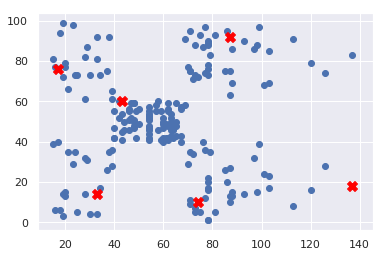

In [0]:
plt.scatter(X[:,0], X[:, 1])
plt.scatter(pp_centroids[:,0], pp_centroids[:,1], label = 'centroid',
           c = 'red', marker = 'X', s = 100)
plt.show()

In [0]:
pp_centroids_float = pp_centroids.astype('float')

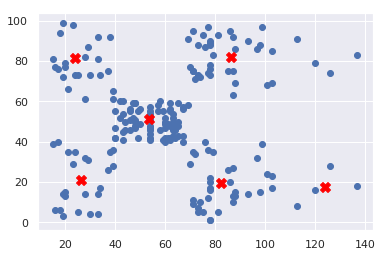

In [0]:
D = np.array([np.sqrt(np.sum((X - c)** 2, axis = 1)) for \
                    c in pp_centroids_float])
D = D.T
C = np.argmin(D, axis = 1)
for i in range(k):
  mean = X[C == i]
  pp_centroids_float[i] = np.mean(mean,axis=0)
    
plt.scatter(X[:,0], X[:, 1])
plt.scatter(pp_centroids_float[:,0], pp_centroids_float[:,1], label = 'centroid',
           c = 'red', marker = 'X', s = 100)
plt.show()

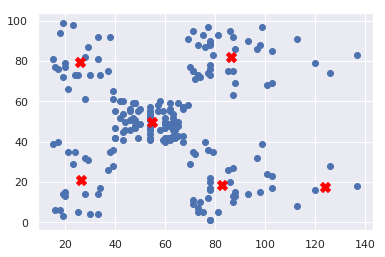

In [0]:
for _ in range(100):
  D = np.array([np.sqrt(np.sum((X - c)** 2, axis = 1)) for \
                    c in pp_centroids_float])
  D = D.T
  C = np.argmin(D, axis = 1)
  for i in range(k):
    mean = X[C == i]
    pp_centroids_float[i] = np.mean(mean,axis=0)
    
plt.scatter(X[:,0], X[:, 1])
plt.scatter(pp_centroids_float[:,0], pp_centroids_float[:,1], label = 'centroid',
           c = 'red', marker = 'X', s = 100)
plt.show()